In [1]:
!git clone https://github.com/quant4junior/algoTrade.git

Cloning into 'algoTrade'...
remote: Enumerating objects: 3986, done.
remote: Counting objects: 100% (3986/3986), done.
remote: Compressing objects: 100% (3916/3916), done.
remote: Total 3986 (delta 134), reused 3898 (delta 64), pack-reused 0
Receiving objects: 100% (3986/3986), 24.53 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Checking out files: 100% (7295/7295), done.


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**3.1 바이앤홀드 전략**

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("./algoTrade/data/us_etf_data/AMZN.csv", index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [4]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("./algoTrade/data/us_etf_data/AMZN.csv", index_col='Date', parse_dates=['Date'])
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


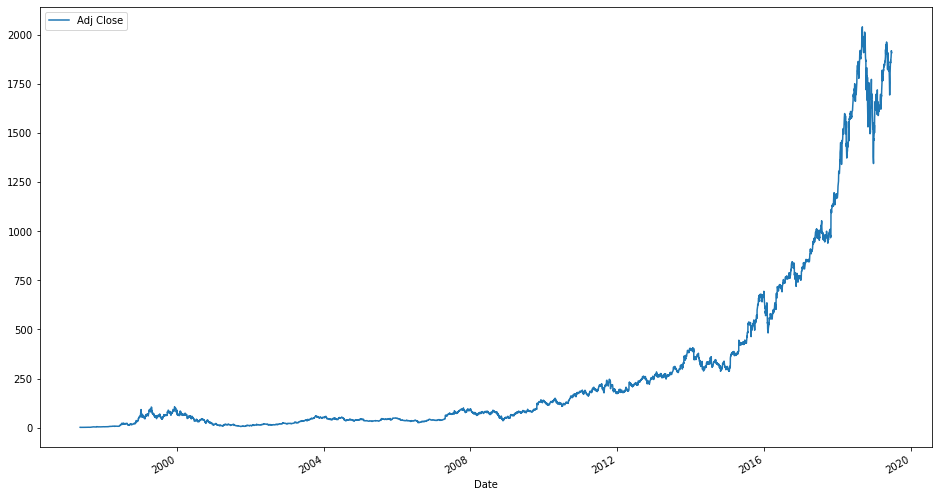

In [15]:
price_df = df.loc[:, ['Adj Close']].copy()
price_df.plot(figsize=(16,9))

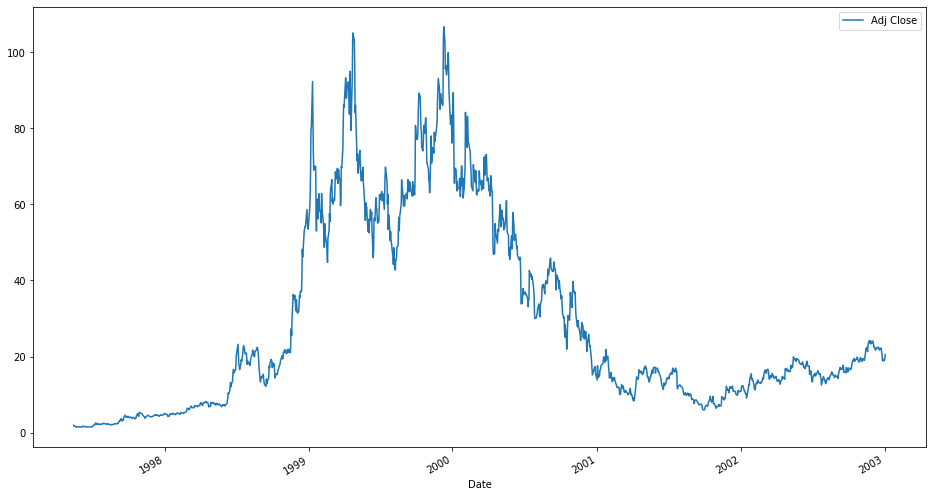

In [16]:
from_date = '1997-01-03'
to_date = '2003-01-03'
price_df.loc[from_date:to_date].plot(figsize=(16,9))

In [17]:
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()
price_df.head()

,Adj Close,daily_rtn
Date,,
1997-05-15,1.958333,NaN
1997-05-16,1.729167,-0.117021
1997-05-19,1.708333,-0.012049
1997-05-20,1.635417,-0.042683
1997-05-21,1.427083,-0.127389


In [21]:
#바이앤홀드 전략에서 일별 수익률을 누적 곱하면 최종적으로 매수한 시점 대비 매도한 시점의 종가 수익률로 계산됨

price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
price_df.head(10)

,Adj Close,daily_rtn,st_rth,st_rtn
Date,,,,
1997-05-15,1.958333,NaN,NaN,NaN
1997-05-16,1.729167,-0.117021,0.882979,0.882979
1997-05-19,1.708333,-0.012049,0.872340,0.872340
1997-05-20,1.635417,-0.042683,0.835107,0.835107
1997-05-21,1.427083,-0.127389,0.728723,0.728723
1997-05-22,1.395833,-0.021898,0.712766,0.712766
1997-05-23,1.500000,0.074627,0.765958,0.765958
1997-05-27,1.583333,0.055555,0.808511,0.808511
1997-05-28,1.531250,-0.032895,0.781915,0.781915


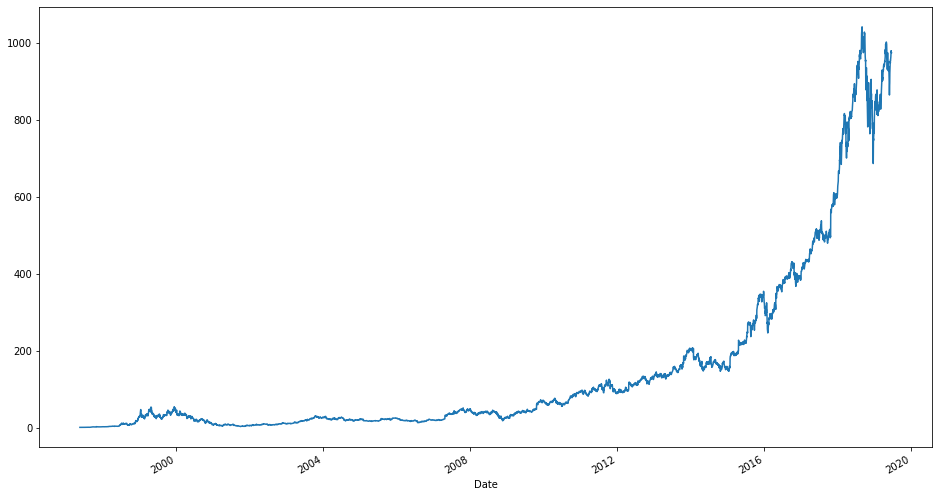

In [23]:
price_df['st_rtn'].plot(figsize = (16,9))

누적 수익 :  10.35693109674889


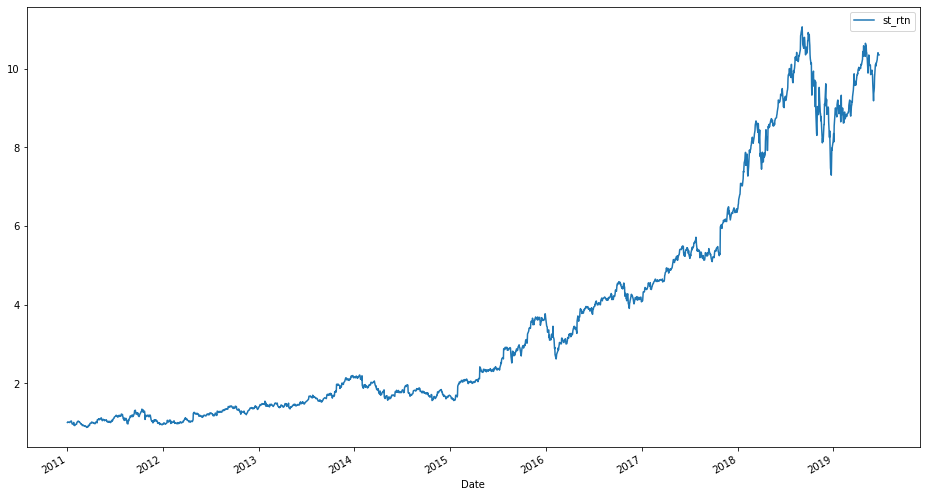

In [24]:
base_date = '2011-01-03'
tmp_df = price_df.loc[base_date:, ['st_rtn']] / price_df.loc[base_date, ['st_rtn']]
last_date = tmp_df.index[-1]
print('누적 수익 : ', tmp_df.loc[last_date, 'st_rtn'])
tmp_df.plot(figsize=(16,9))

In [31]:
#성과 분석 지표
#연평균 복리 수익률(CAGR)
#최대 낙폭(MDD)
#변동성(Vol)
#샤프 지수(Sharpe ratio)

CAGR = price_df.loc['2019-06-24', 'st_rtn'] ** (252./len(price_df.index)) - 1

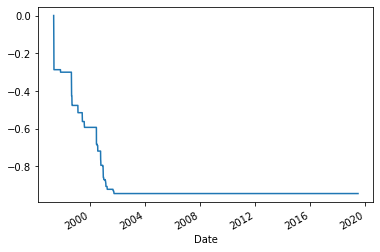

In [32]:
historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

In [33]:
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
#변동성은 수익률의 표준편차

In [34]:
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
#샤프 지수는 위험 대비 수익성 지표라고 볼 수 있다

In [35]:
CAGR = price_df.loc['2019-06-24', 'st_rtn'] ** (252./len(price_df.index)) - 1
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)
VOL = np.std(price_df['daily_rtn']) * np.sqrt(252.)
MDD = historical_dd.min()
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(Sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

CAGR :  36.58 %
Sharpe :  0.81
VOL :  60.09 %
MDD :  94.4 %
